<a href="https://colab.research.google.com/github/PraveenAnanth5451/Deep_Learning_Projects/blob/main/CIFAR_10_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"praveenananth","key":"3bb91d2a88b1305405a80f8d226baa9f"}'}

In [2]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = "/content/cifar-10.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is Extracted")

The dataset is Extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 30.9 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import The Dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir("/content/train")

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])

['45877.png', '43417.png', '13991.png', '30145.png', '41652.png']


Labels Processing

In [15]:
labels_df = pd.read_csv("/content/trainLabels.csv")

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [19]:
labels_df["label"].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [20]:
labels_df['label'].head()

,label
0,frog
1,truck
2,truck
3,deer
4,automobile


In [21]:
labels_dic = {"airplane":0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dic[i] for i in labels_df["label"]]

In [22]:
print(labels[:5])

[6, 9, 9, 4, 1]


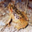

In [23]:
# displaying the sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/train/7796.png")
cv2_imshow(img)

In [24]:
id_list = list(labels_df["id"])

In [25]:
print(id_list[:5])

[1, 2, 3, 4, 5]


**Image processing**

In [26]:
# Convert images to numpy arrays

train_data_folder = "/content/train/"

data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id)+".png")
  image = np.array(image)
  data.append(image)

In [27]:
type(data)

list

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
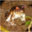

In [30]:
data[0]

In [31]:
labels[0]

6

In [32]:
# Convert images list and labels list to numpa array

X = np.array(data)
y = np.array(labels)

In [33]:
X.shape , y.shape

((50000, 32, 32, 3), (50000,))

Split the data into Train and Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 32, 32, 3), (40000,), (10000, 32, 32, 3), (10000,))

In [36]:
# Scale the Feature and labels
X_train = X_train/255
X_test = X_test/255

In [37]:
print(X_train[0])

[[[0.13333333 0.14117647 0.16862745]
  [0.14509804 0.14509804 0.2       ]
  [0.17254902 0.17254902 0.25098039]
  ...
  [0.24313725 0.28627451 0.36470588]
  [0.20392157 0.24705882 0.3254902 ]
  [0.17647059 0.22352941 0.30196078]]

 [[0.1372549  0.1372549  0.14509804]
  [0.13333333 0.13333333 0.15686275]
  [0.13333333 0.12941176 0.16862745]
  ...
  [0.22745098 0.27058824 0.34901961]
  [0.19607843 0.23529412 0.31372549]
  [0.18431373 0.22745098 0.30588235]]

 [[0.13333333 0.12941176 0.1372549 ]
  [0.12941176 0.1254902  0.14117647]
  [0.12941176 0.1254902  0.14901961]
  ...
  [0.25882353 0.30196078 0.38039216]
  [0.2        0.24313725 0.32156863]
  [0.20784314 0.25098039 0.32941176]]

 ...

 [[0.1254902  0.1254902  0.14901961]
  [0.1254902  0.12156863 0.14509804]
  [0.12941176 0.12941176 0.14901961]
  ...
  [0.16078431 0.14901961 0.17647059]
  [0.13333333 0.12156863 0.14901961]
  [0.14117647 0.1254902  0.15686275]]

 [[0.12941176 0.12156863 0.14117647]
  [0.1254902  0.11764706 0.14117647]


In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 10

# setting up the layers of neural network

tf.random.set_seed(42)

model = keras.Sequential([
    keras.layers.Input(shape = (32,32,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(num_of_classes, activation = "softmax")
])

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [40]:
# training the model
model.fit(X_train, y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2078 - loss: 2.1367 - val_accuracy: 0.2920 - val_loss: 1.8999
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3067 - loss: 1.8922 - val_accuracy: 0.3165 - val_loss: 1.8681
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3222 - loss: 1.8544 - val_accuracy: 0.3255 - val_loss: 1.8539
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3354 - loss: 1.8322 - val_accuracy: 0.3368 - val_loss: 1.8333
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3405 - loss: 1.8172 - val_accuracy: 0.3405 - val_loss: 1.8211
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3482 - loss: 1.8023 - val_accuracy: 0.3450 - val_loss: 1.8092
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3536 - loss: 1.7916 - val_accuracy: 0.3480 - val_loss: 1.8033
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3586 - loss: 1.7822 - 

**ResNet50**

In [41]:
from tensorflow.keras import Sequential,models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam

In [42]:
convolutional_base = ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [43]:
model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64 , activation = "relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_of_classes, activation = "softmax"))

In [44]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.RMSprop(learning_rate = 2e-5),
              metrics = ["accuracy"])

In [45]:
history = model.fit(X_train, y_train, validation_split = 0.1,  epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 425s 332ms/step - accuracy: 0.3228 - loss: 2.0615 - val_accuracy: 0.7333 - val_loss: 0.9874
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 417s 335ms/step - accuracy: 0.6528 - loss: 1.1099 - val_accuracy: 0.8783 - val_loss: 0.5056
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 381s 334ms/step - accuracy: 0.7877 - loss: 0.7749 - val_accuracy: 0.8940 - val_loss: 0.4105
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 334ms/step - accuracy: 0.8634 - loss: 0.5712 - val_accuracy: 0.9168 - val_loss: 0.3290
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 334ms/step - accuracy: 0.9106 - loss: 0.4284 - val_accuracy: 0.9265 - val_loss: 0.2818
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 373s 326ms/step - accuracy: 0.9439 - loss: 0.3198 - val_accuracy: 0.9225 - val_loss: 0.2784
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 334ms/step - accuracy: 0.9600 - loss: 0.2508 - val_accuracy: 0.9240 - val_loss: 0.2663
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 376s 334ms/step - ac

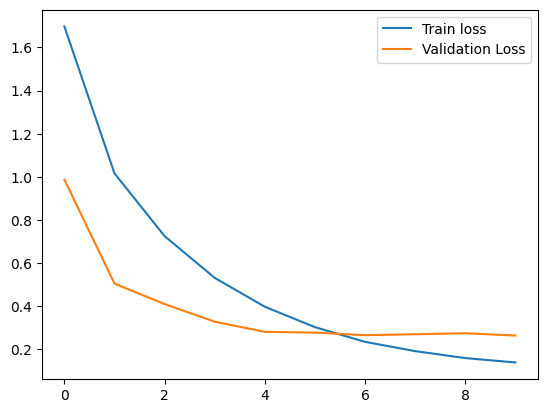

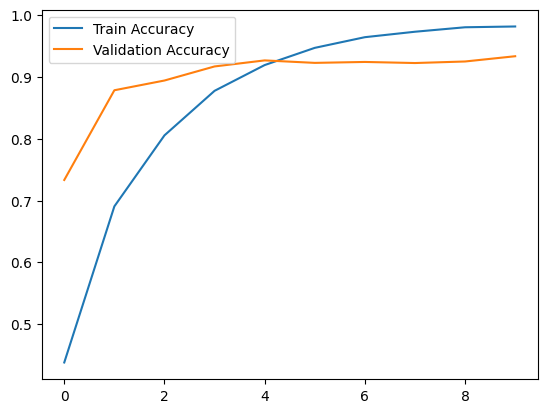

In [46]:
# plot the loss value
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [47]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss : ",loss)
print("Model Accuracy : ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - accuracy: 0.9382 - loss: 0.2357
Test Loss :  0.25040051341056824
Model Accuracy :  0.9333000183105469


In [68]:
import cv2
def prediction(image_path):
  input_image = cv2.imread(image_path)
  cv2_imshow(input_image)
  input_image_resize = cv2.resize(input_image, (32,32))

  input_image_scaled = input_image_resize/255

  image_reshape = np.reshape(input_image_scaled, [1,32,32,3])

  input_prediction = model.predict(image_reshape)

  input_pred_label = np.argmax(input_prediction)

  if input_pred_label == 0:
      print("The image is an Airplane")
  elif input_pred_label == 1:
      print("The image is an Automobile")
  elif input_pred_label == 2:
      print("The image is a Bird")
  elif input_pred_label == 3:
      print("The image is a Cat")
  elif input_pred_label == 4:
      print("The image is a Deer")
  elif input_pred_label == 5:
      print("The image is a Dog")
  elif input_pred_label == 6:
      print("The image is a Frog")
  elif input_pred_label == 7:
      print("The image is a Horse")
  elif input_pred_label == 8:
      print("The image is a Ship")
  elif input_pred_label == 9:
      print("The image is a Truck")
  else:
      print("Unknown label")



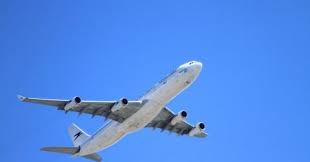

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The image is an Airplane


In [63]:
prediction("/content/airplane.jpeg")

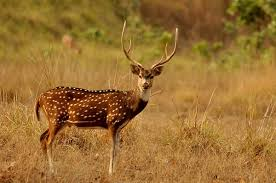

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The image is a Deer


In [64]:
prediction("/content/deer.jpeg")

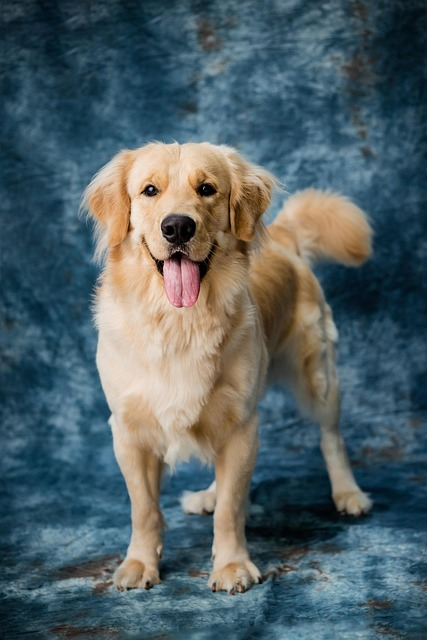

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The image is a Dog


In [70]:
prediction("/content/drive/MyDrive/DL project/dog-8198719_640.jpg")

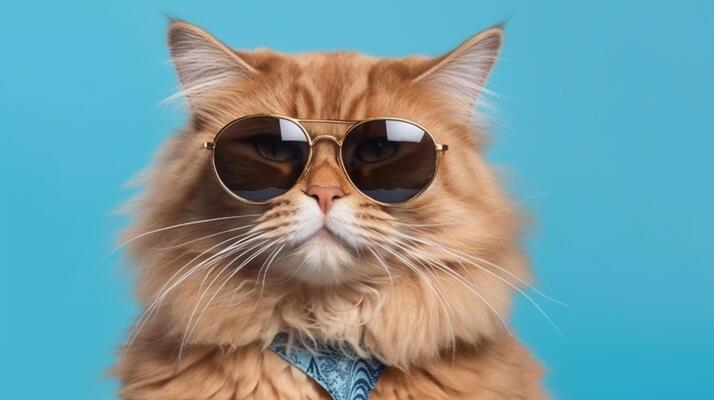

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
The image is a Cat


In [72]:
prediction("/content/drive/MyDrive/DL project/ai-generative-cute-cat-isolated-on-solid-background-photo.jpg")

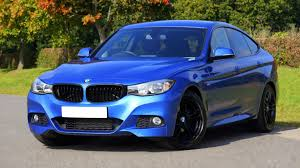

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
The image is an Automobile


In [73]:
prediction("/content/drive/MyDrive/DL project/car.jpeg")

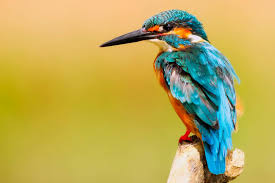

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The image is a Bird


In [74]:
prediction("/content/drive/MyDrive/DL project/bird.jpeg")

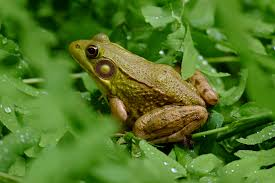

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The image is a Frog


In [75]:
prediction("/content/drive/MyDrive/DL project/frog.jpeg")

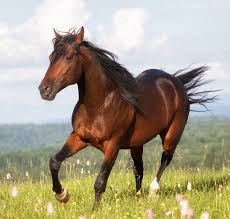

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The image is a Horse


In [76]:
prediction("/content/drive/MyDrive/DL project/horse.jpeg")

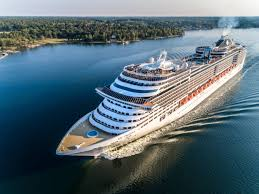

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The image is a Ship


In [77]:
prediction("/content/drive/MyDrive/DL project/ship.jpeg")

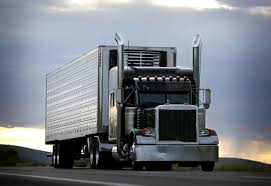

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The image is a Truck


In [78]:
prediction("/content/drive/MyDrive/DL project/truck1.jpeg")